# Tutorial "Algorithmic Methods for Network Analysis with NetworKit" (Part 1)
Welcome to the hands-on session of our tutorial! This tutorial is based on the user guide of NetworKit, our network analysis software. You will learn in this tutorial how to use NetworKit for fundamental tasks in network analysis.

NetworKit can run in your browser (thanks to IPython notebooks) and is still very fast (thanks to C++ code in the background). It is easy to mix text with code and solutions in this environment. Thus, you should be able to obtain your results in a convenient and quick manner. This is not only true for the rather small graphs we use for this tutorial, but for larger instances in production runs as well. In particular you can mix text, code, plots and other rich media in this environment. Since this allows a simplified execution and interpretation of experiments, the interactive approach followed by NetworKit can simplify the cyclic algorithm engineering process significantly (without compromising algorithm performance).

## Preparation
Let's start by making NetworKit available in your session. Click into the cell below and hit space-return or click the "Play" button or select "Cell -> Run" in the menu.

In [1]:
from networkit import *

In [2]:
%matplotlib inline

In case a Python warning appears that recommends an update to Python 3.4, simply ignore it for this tutorial. Python 3.3 works just as fine for our purposes.

IPython lets us use familiar shell commands in a Python interpreter. Use one of them now to change into the directory where you unpacked the `tutorial.zip`:

In [4]:
pwd

'/home/naud/Repos/git/networkit_tutorial/tutorial'

## Reading Graphs
Let us start by reading a network from a file on disk: [PGPgiantcompo.graph](http://www.cc.gatech.edu/dimacs10/archive/data/clustering/PGPgiantcompo.graph.bz2). NetworKit supports a number of popular graph file formats, among them the METIS adjacency list format. There is a convenient function in the top namespace to read a graph from a file:

In [11]:
G = readGraph("../input/PGPgiantcompo.graph", Format.METIS)

In the course of this tutorial, we are going to work (among others) on the `PGPgiantcompo` network, a social network/web of trust in which nodes are PGP keys and an edge represents a signature from one key on another (web of trust). It is distributed with NetworKit as a good starting point.

## The Graph Object

`Graph` is the central class of NetworKit. An object of this type represents an optionally weighted network. In this tutorial we work with undirected graphs, but NetworKit supports directed graphs as well.

Let us inspect several of the methods which the class provides. Maybe the most basic information is the number of nodes and edges in as well as the name of the network.

In [12]:
n = G.numberOfNodes()
m = G.numberOfEdges()
print(n, m)

10680 24316


In [13]:
G.toString()

b'Graph(name=PGPgiantcompo, n=10680, m=24316)'

NetworKit stores nodes simply as integer indices. Edges are pairs of such indices. The following prints the indices of the first ten nodes and edges, respectively.

In [14]:
V = G.nodes()
print(V[:10])
E = G.edges()
print(E[:10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(42, 11), (101, 28), (111, 92), (128, 87), (141, 0), (165, 125), (169, 111), (176, 143), (187, 38), (192, 105)]


Another very useful feature is to determine if an edge is present and what its weight is. In case of unweighted graphs, edges have the default weight 1.

In [15]:
edgeExists = G.hasEdge(42,11)
if edgeExists:
    print("Weight of existing edge:", G.weight(42,11))
print("Weight of nonexisting edge:", G.weight(42,12))

Weight of existing edge: 1.0
Weight of nonexisting edge: 0.0


Many graph algorithms can be expressed with iterators over nodes or edges. As an example, let us iterate over the nodes to determine how many of them have more than 100 neighbors.

In [18]:
count = 0 # counts number of nodes with more than 100 neighbors
for v in G.nodes():
    if G.degree(v) > 100:
        count = count + 1
print("Number of nodes with more than 100 neighbors: ", count)

Number of nodes with more than 100 neighbors:  6


## Interesting Features of a Network
Let us become more concrete: In the talk that accompanies this tutorial you learned about basic network features. Go back to the 'Analytics' section of the slides and answer the following questions within the box below, including the code which found your answer (click on the box to enter text). If you need information on method prototypes, you have at least two options: Use the built-in code completion (tab) or the project website, which offers documentation in the form of an automatically generated reference: https://networkit.iti.kit.edu/documentation/ (Python/C++ Documentation in the left navigation bar).

**After** you answered the questions, go on with Tutorial #2.

### Q&A Session #1
1. Who (which vertex) has the least/most 'friends' and how many?
**Answer:**

2. How many neighbors does a vertex have on average?
**Answer:** 

3. Does the degree distribution follow a power law?
**Answer:** 

4. How often is the friend of a friend also a friend? Let's go for the average fraction here, other definitions are possible...
**Answer:**

5. How many connected components does the graph have?
**Answer:** 

In [71]:
# Enter code for Q&A Session #1 here
ls = [(v, G.degree(v)) for v in V]
deg = [G.degree(v) for v in V]
ls1 = [el for el in ls if el[1]>100]     
# 1.
min_deg = min(deg)
max_deg = max(deg)
ls2 = [el for el in ls if el[1]==min_deg]
ls3 = [el for el in ls if el[1]==max_deg]
# 2.
mean_deg = sum(deg)/len(deg)
# 5.
# con = len([el for el in ls if el[1]!=0])
# components.ConnectedComponents(G).run().numberOfComponents()

1

In [46]:
dd = sorted(centrality.DegreeCentrality(G).run().scores(), reverse=True)
import powerlaw
fit = powerlaw.Fit(dd)
print("1-3) Power law fit: ", fit.alpha)

1-3) Power law fit:  4.41850713924


Calculating best minimal value for power law fit
/usr/local/lib/python3.5/dist-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [58]:
%matplotlib inline
fit.plot_cdf

<bound method Fit.plot_cdf of <powerlaw.Fit object at 0x7f8bd8121828>>

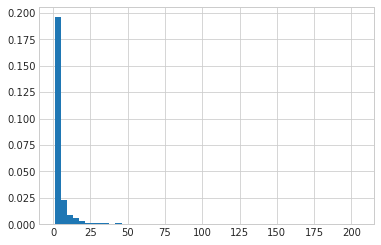

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(deg,bins=50, normed=True)
plt.show()